In [14]:
%reload_ext autoreload
%autoreload 2

import json
import os
from glob import glob
import pandas as pd
import numpy as np
import ast
from tqdm import tqdm_notebook as tqdm
import sys
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [15]:
meta = pd.read_pickle('../data/total.pkl')
meta

,loan_finished,folder_name,date_of_birth,loan_date,loan_end_date,adress_index,adress_region,source,childs,education,...,gender,marital_status,total_taken,total_given,loan_etap_median,loan_etap_max,prolong,total_profit,total_profit_percent,age
0,1,63219-39006_49363450-d9f8-11e9-997d-00155d2d0507,1960-12-08,2019-09-18,2019-10-04,445042,Самарская обл,Звонок КС,0.0,,...,Женский,Женат / Замужем,6000.0,6000.00,1.0,1.0,0.0,0.00,0.000000,58.0
1,0,61519-40024_5f02d0ad-8ccf-11e9-997a-00155d2d0507,1990-09-28,2019-09-27,2019-10-13,446100,Самарская обл,Звонок КС,1.0,Средне-специальное,...,Женский,Женат / Замужем,8000.0,3680.00,NaN,NaN,1.0,-4320.00,-0.540000,28.0
2,1,63920-05007_df0dd703-3bb2-11ea-997f-00155d2d0507,1995-04-01,2020-01-21,2020-02-06,187556,Ленинградская обл,Интернет,0.0,,...,Мужской,Холост / Не замужем,5000.0,5902.74,1.0,1.0,0.0,902.74,0.180548,24.0
3,0,61819-42007_d44db0ac-0aac-11e6-a141-f01fafe92f9d,1967-10-02,2019-10-09,2019-10-25,460022,Оренбургская обл,Звонок КС,1.0,Средне-специальное,...,Мужской,Женат / Замужем,3000.0,0.00,NaN,NaN,0.0,-3000.00,-1.000000,52.0
4,0,63419-39007_cf6a1ebb-d945-11e9-997d-00155d2d0507,1991-07-18,2019-09-17,2019-10-03,443091,Самарская обл,Банер / Короб на офисе,1.0,,...,Женский,Холост / Не замужем,2000.0,0.00,NaN,NaN,0.0,-2000.00,-1.000000,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9666,1,62720-19009_9cf6e463-fdb5-11e3-b883-f01fafe92f9d,1945-03-20,2020-05-02,2020-05-18,446115,Самарская обл,Банер / Короб на офисе,0.0,Среднее,...,Женский,Холост / Не замужем,3000.0,3060.00,1.0,1.0,0.0,60.00,0.020000,75.0
9667,1,63119-40002_e7e128cd-dde0-11e9-997d-00155d2d0507,1987-04-20,2019-09-23,2019-10-09,446253,Самарская обл,Звонок КС,0.0,среднее-профессиональное,...,Мужской,Холост / Не замужем,2000.0,2000.00,1.0,1.0,0.0,0.00,0.000000,32.0
9668,0,61819-40016_09597111-c79a-11e9-997d-00155d2d0507,1988-10-22,2019-09-28,2019-10-14,460052,Оренбургская обл,Звонок КС,1.0,Высшее,...,Женский,Женат / Замужем,8000.0,1300.00,NaN,NaN,1.0,-6700.00,-0.837500,30.0
9669,1,62419-51002_99c8f5e2-1a48-11ea-997d-00155d2d0507,1970-10-28,2019-12-09,2019-12-25,446455,Самарская обл,Звонок КС,0.0,Средне-специальное,...,Мужской,Женат / Замужем,2000.0,2000.00,1.0,1.0,0.0,0.00,0.000000,49.0


In [16]:
features = pd.read_csv('df.csv', index_col=0)
features

,left_eye,right_eye,XFrontal,YFrontal,folder_name,Асимметрия челюсти,Высота бровей,Наклон глаз,Полнота верхней губы,Полнота нижней губы,...,Верхнее веко,Асимметрия брови,Наклон бровей,Размер рта,Асимметрия наклона глаз,Асимметрия носа,Размер глаз,Оттопыренность ушей,Ширина челюсти,Уголки рта
0,"[288.4012145996094, 213.67669677734375]","[361.6796875, 225.9827117919922]",-0.075502,-0.014009,61519-40024_5f02d0ad-8ccf-11e9-997a-00155d2d0507,5.355693,0.237798,-5.979254,1.988468,5.856188,...,0.852201,-1.198675,13.448118,38.637267,-4.099059,2.812044,5.785166,5.681337,0.916088,-19.699498
1,"[564.9388427734375, 1132.5943603515625]","[586.5674438476562, 1135.5479736328125]",0.004382,-0.034267,63920-05007_df0dd703-3bb2-11ea-997f-00155d2d0507,43.983790,0.193963,-4.267893,1.421534,7.121541,...,6.699192,1.678305,5.822327,39.396421,-4.267893,79.246535,5.004160,2.665377,0.850755,0.322047
2,"[285.977783203125, 150.2622833251953]","[374.21533203125, 130.36241149902344]",-0.033325,-0.018208,61819-42007_d44db0ac-0aac-11e6-a141-f01fafe92f9d,8.368083,0.201253,-2.941949,0.457604,4.759157,...,1.307884,-16.864780,7.208498,37.735019,2.941949,39.071457,6.373682,8.498366,0.911583,-6.749982
3,"[361.95703125, 179.08526611328125]","[439.3716125488281, 216.22108459472656]",0.002741,0.012453,63419-39007_cf6a1ebb-d945-11e9-997d-00155d2d0507,-0.889825,0.206869,-3.344650,1.422768,7.320639,...,0.936052,0.931403,11.175436,33.231362,3.344650,2.594027,5.280501,7.377316,0.801330,-1.613539
4,"[301.298095703125, 208.13145446777344]","[381.4844055175781, 216.86012268066406]",0.008033,-0.007532,61219-40006_007dd868-52c0-11e5-a760-f01fafe92f9d,1.347632,0.227415,0.061542,0.938868,3.905178,...,0.941927,0.057497,5.379592,40.376590,0.061542,-1.623114,5.307137,17.672816,0.928234,6.170175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8239,"[326.4447937011719, 292.4300231933594]","[387.5877685546875, 292.5203552246094]",-0.000584,-0.000037,62720-19009_9cf6e463-fdb5-11e3-b883-f01fafe92f9d,6.915114,0.238078,-5.588716,2.176512,9.942578,...,1.096444,4.798763,9.198286,41.563361,-2.110511,-4.670395,5.807272,4.946617,0.930438,2.385944
8240,"[423.3175354003906, 197.9884796142578]","[495.1734924316406, 196.69557189941406]",-0.112672,0.116685,63119-40002_e7e128cd-dde0-11e9-997d-00155d2d0507,-2.217752,0.249940,5.739098,1.413821,5.184010,...,1.393095,1.573117,0.681964,33.513487,3.723193,-6.081727,5.690065,14.138209,0.919177,-13.102038
8241,"[412.2699279785156, 281.91583251953125]","[494.3078308105469, 273.3038635253906]",-0.038868,0.062594,61819-40016_09597111-c79a-11e9-997d-00155d2d0507,-6.855907,0.246209,-8.972627,2.121132,6.748886,...,0.787078,-4.597995,7.603021,31.619966,-5.795623,3.378688,5.474703,8.484527,0.934488,-30.963757
8242,"[310.13885498046875, 188.00743103027344]","[411.7592468261719, 175.1940155029297]",0.086074,-0.099894,62419-51002_99c8f5e2-1a48-11ea-997d-00155d2d0507,35.891756,0.181747,-4.438933,0.377239,4.401123,...,6.364565,8.982203,18.779051,34.322082,4.438933,62.861561,6.058024,5.029855,0.870924,-52.658441


In [17]:
df = pd.merge(left=meta, right=features, on='folder_name', how='inner')

In [18]:
job_dict = {'продавец-кассир':'продавец', 'пенсионерка':'пенсионер', 'уборщица':'уборщик', 
            'директор':'руководитель', 'продавец-консультант':'продавец', 'пенсионер по возрасту':'пенсионер',
            'санитарка':'санитар', 'помощник бурильщика':'бурильщик', 'помошник бурильщика':'бурильщик', 
            'кассир':'продавец', 'пекарь':'повар', 'дорожный рабочий':'разнорабочий', 
            'пенсионер по старости':'пенсионер', 'пенсионер по инвалидности':'пенсионер', 'продавец кассир':'продавец',
            'подсобный рабочий':'разнорабочий', 'сторож':'охранник', 'автомойщица':'автомойщик', 'кондуктор':'контролер', 
            'на пенсии':'пенсионер', 'водитель-экспедитор':'водитель', 'стропольщик':'стропальщик', 
            'электромонтажник':'электрик', 'слесарь-ремонтник':'слесарь', 
            'старший продавец':'продавец', 'продавец консультант':'продавец', 'штукатур-маляр':'строитель', 
            'уборщик служебных помещений':'уборщик', 'электросварщик':'электрик', 'упаковщица':'упаковщик', 
            'газоэлектросварщик':'электрик', 'кондитер':'повар', 'слесарь-сантехник':'слесарь', 'прораб':'строитель', 
            'электромантер':'электрик', 'слесарь мср':'слесарь', 'индивидуальный предприниматель':'ип', 
            'пфрф':'пф рф', 'электрогазосварщик':'электрик', 'техничка':'уборщик', 'рабочий':'разнорабочий', 
            'таксист':'водитель', 'электромонтер':'электрик', 'торговый представитель':'продавец', 
            'водитель погрузчика':'водитель', 'экспедитор':'водитель', 'охраник':'охранник',
            'домохозяйка':'-', 'предприниматель':'ип'}

df['job'] = df['job'].apply(lambda x: x.lower().strip())
# jobs_available = job_dict.values()
jobs_available = ['пенсионер', 'продавец', 'водитель', 'руководитель', 'разнорабочий', 'слесарь', 'уборщик', 'повар', 'монтажник', 'охранник', 'грузчик', 'бурильщик', '-', 'электрик', 'оператор', 'администратор', 'сварщик', 'строитель', 'санитар', 'мастер', 'менеджер', 'бухгалтер', 'охраник', 'стропальщик', 'кладовщик', 'автомойщик', 'воспитатель', 'дворник', 'диспетчер', 'контролер', 'ип', 'отделочник', 'автослесарь', 'инженер', 'медсестра', 'кухонный работник', 'менеджер по продажам', 'учитель', 'упаковщик', 'бригадир', 'пф рф', 'парикмахер', 'вязальщик', 'механизатор', 'маляр', 'бетонщик', 'машинист', 'официант', 'почтальон', 'бармен', 'другое']


df['job'] = df['job'].replace(job_dict).apply(lambda x: x.lower().strip())
df['job'] = df['job'].apply(lambda x: (x if x in jobs_available else 'другое'))
df['education'] = df['education'].replace({'':'-'}).apply(lambda x: x.lower().strip())
df['marital_status'] = df['marital_status'].replace({'':'-'}).apply(lambda x: x.lower().strip())
df['source'] = df['source'].apply(lambda x: x if x in ['Звонок КС', 'Интернет', 'Банер / Короб на офисе', 'Наружная реклама'] else 'Другое')


df['fraud'] = df['total_profit'] < 0
df['total_profit'] = df['total_profit'].apply(lambda x: 20000 if x > 20000 else x)
df['total_profit'] = df['total_profit'].apply(lambda x: -20000 if x < -20000 else x)


In [19]:

df2 = df.append(df)
df2 = df2.append(df2.sample(frac=0.1))
df2

,loan_finished,folder_name,date_of_birth,loan_date,loan_end_date,adress_index,adress_region,source,childs,education,...,Асимметрия брови,Наклон бровей,Размер рта,Асимметрия наклона глаз,Асимметрия носа,Размер глаз,Оттопыренность ушей,Ширина челюсти,Уголки рта,fraud
0,0,61519-40024_5f02d0ad-8ccf-11e9-997a-00155d2d0507,1990-09-28,2019-09-27,2019-10-13,446100,Самарская обл,Звонок КС,1.0,средне-специальное,...,-1.198675,13.448118,38.637267,-4.099059,2.812044,5.785166,5.681337,0.916088,-19.699498,True
1,1,63920-05007_df0dd703-3bb2-11ea-997f-00155d2d0507,1995-04-01,2020-01-21,2020-02-06,187556,Ленинградская обл,Интернет,0.0,-,...,1.678305,5.822327,39.396421,-4.267893,79.246535,5.004160,2.665377,0.850755,0.322047,False
2,0,61819-42007_d44db0ac-0aac-11e6-a141-f01fafe92f9d,1967-10-02,2019-10-09,2019-10-25,460022,Оренбургская обл,Звонок КС,1.0,средне-специальное,...,-16.864780,7.208498,37.735019,2.941949,39.071457,6.373682,8.498366,0.911583,-6.749982,True
3,0,63419-39007_cf6a1ebb-d945-11e9-997d-00155d2d0507,1991-07-18,2019-09-17,2019-10-03,443091,Самарская обл,Банер / Короб на офисе,1.0,-,...,0.931403,11.175436,33.231362,3.344650,2.594027,5.280501,7.377316,0.801330,-1.613539,True
4,0,61219-40006_007dd868-52c0-11e5-a760-f01fafe92f9d,1983-09-24,2019-09-25,2019-10-11,461050,Оренбургская обл,Звонок КС,4.0,среднее-техническое,...,0.057497,5.379592,40.376590,0.061542,-1.623114,5.307137,17.672816,0.928234,6.170175,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5802,1,61319-41004_f5dca14b-25bc-11e8-80ee-000c293676f4,1961-08-05,2019-09-30,2019-10-16,461081,Оренбургская обл,Банер / Короб на офисе,0.0,среднее-техническое,...,3.845531,8.819613,40.603859,-12.724356,-3.260619,5.683462,19.130218,0.947332,-1.909152,False
1874,1,64720-27101_8f2130c0-b78f-11ea-9983-00155d2d0507,1970-01-14,2020-06-26,2020-07-12,346400,Ростовская,Интернет,0.0,-,...,0.631957,9.794082,40.371818,3.256868,-4.050673,5.352432,10.380854,1.022735,-16.242263,False
1783,1,64720-21118_d9b516a0-9520-11ea-9983-00155d2d0507,1989-11-23,2020-05-17,2020-06-02,452960,Башкортостан Респ,Интернет,1.0,высшее,...,-5.903610,11.980206,29.897033,-8.430078,75.386247,5.809167,10.645296,0.773360,-6.441600,False
6874,1,62419-49019_ec95088e-1262-11ea-997d-00155d2d0507,1985-12-18,2019-11-29,2019-12-15,446450,Самарская обл,Звонок КС,1.0,среднее,...,-1.308372,2.710298,43.597399,1.406533,0.639930,7.108325,15.551953,1.001011,8.355453,False


<AxesSubplot:xlabel='total_profit', ylabel='Count'>

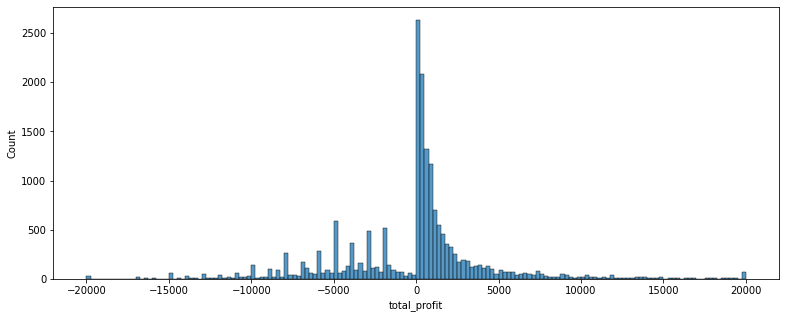

In [7]:
plt.figure(figsize=(13,5))
sns.histplot(df2, x='total_profit')

<AxesSubplot:xlabel='age', ylabel='Count'>

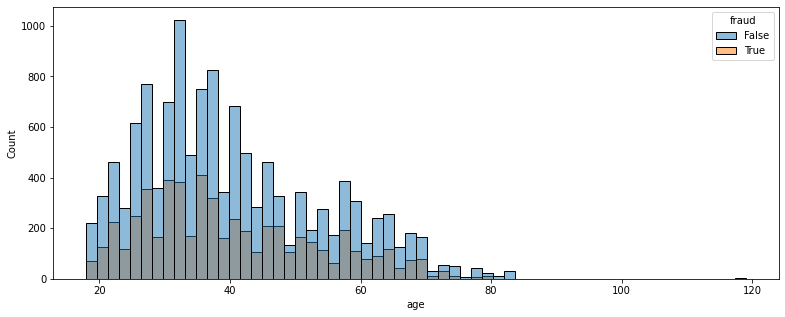

In [8]:
plt.figure(figsize=(13,5))
sns.histplot(df2, x='age', bins=60, hue='fraud')

<AxesSubplot:xlabel='source', ylabel='Count'>

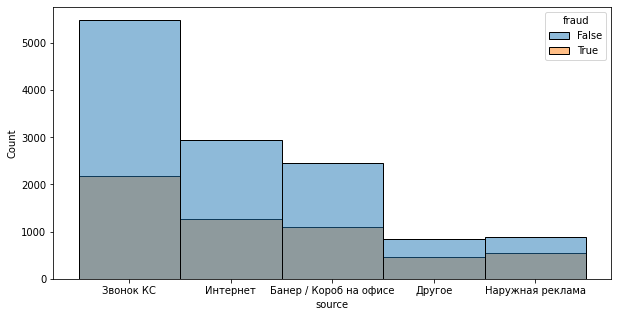

In [9]:
plt.figure(figsize=(10,5))
sns.histplot(df2, x='source', bins=6, hue='fraud')

<AxesSubplot:xlabel='gender', ylabel='Count'>

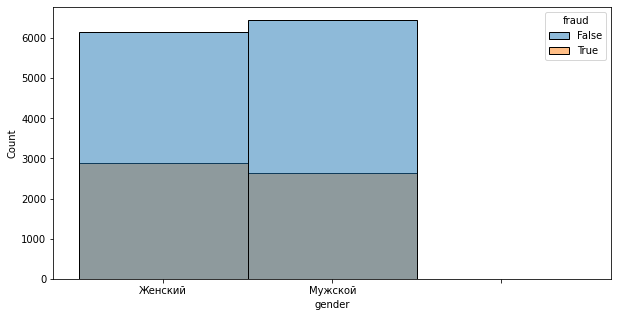

In [10]:
plt.figure(figsize=(10,5))
sns.histplot(df2, x='gender', bins=6, hue='fraud')

<AxesSubplot:xlabel='marital_status', ylabel='Count'>

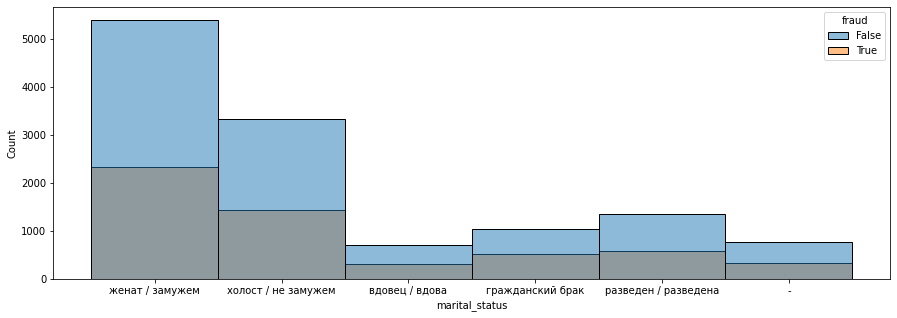

In [11]:
plt.figure(figsize=(15,5))
sns.histplot(df2, x='marital_status', bins=6, hue='fraud')

<AxesSubplot:xlabel='education', ylabel='Count'>

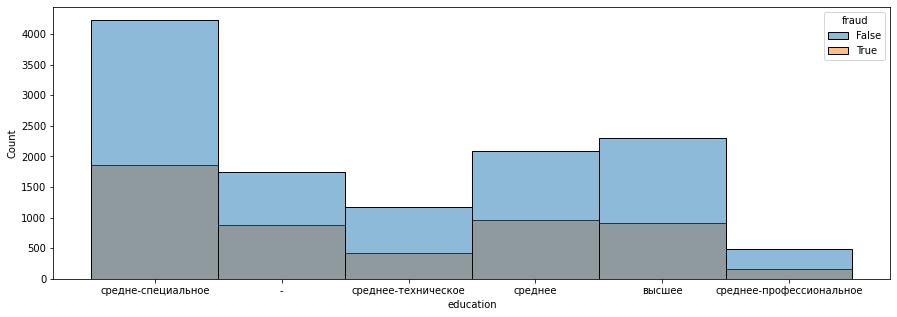

In [12]:
plt.figure(figsize=(15,5))
sns.histplot(df2[df2['education'].isin(df2['education'].value_counts()[:6].index)], x='education', bins=6, hue='fraud')

In [20]:
df2.to_csv('df2_total.csv')
df.to_csv('df_total.csv')
